<a href="https://colab.research.google.com/github/notjaswanth69/fs-3/blob/main/fs_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(768, 8)


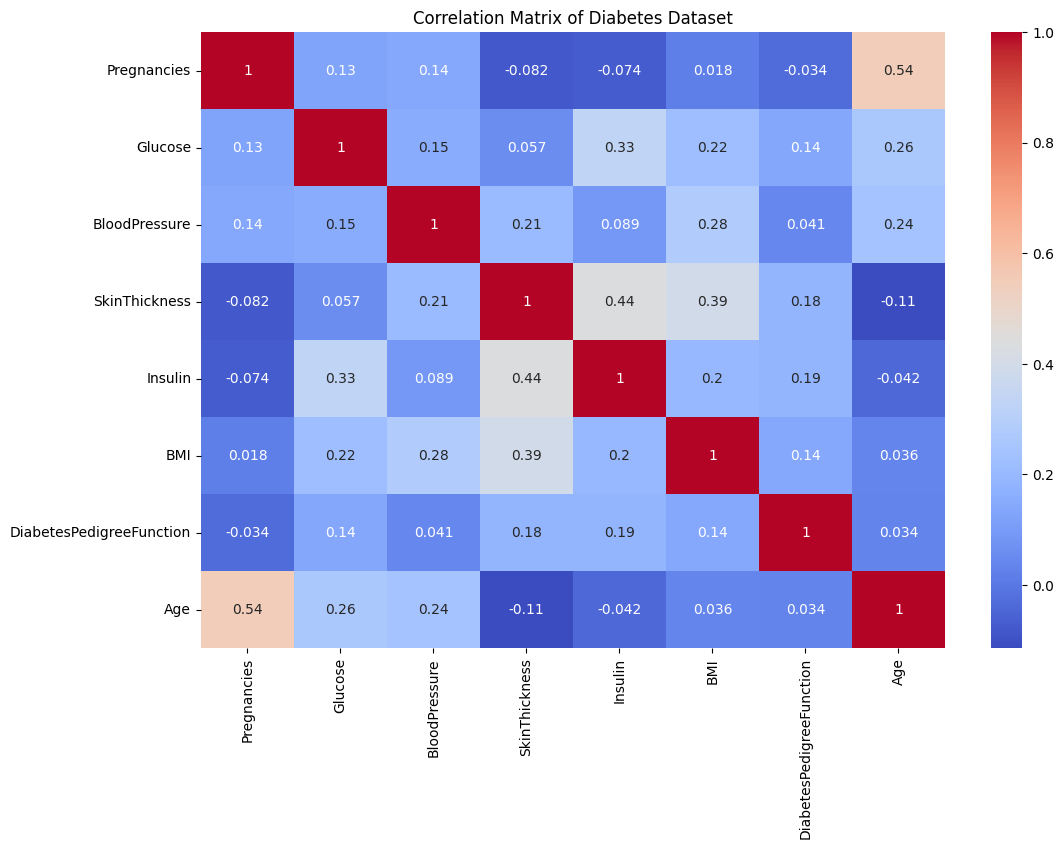

Highly correlated pairs of features (correlation > 0.8):
Accuracy with all features: 0.7013
Accuracy with reduced features: 0.7013
Difference in accuracy: 0.0000


In [3]:

import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
X=data.drop(['Outcome'],axis=1)
print(x.shape)
y=data['Outcome']


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
corr_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Diabetes Dataset")
plt.show()

high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns
                   if i != j and abs(corr_matrix.loc[i, j]) > 0.8]

print("Highly correlated pairs of features (correlation > 0.8):")
for pair in high_corr_pairs:
    print(pair)

to_remove = set([pair[1] for pair in high_corr_pairs])
X_reduced = X.drop(columns=to_remove)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_reduced_train, X_reduced_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
full_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with all features: {full_accuracy:.4f}")

model.fit(X_reduced_train, y_train)
y_reduced_pred = model.predict(X_reduced_test)
reduced_accuracy = accuracy_score(y_test, y_reduced_pred)
print(f"Accuracy with reduced features: {reduced_accuracy:.4f}")

accuracy_diff = full_accuracy - reduced_accuracy
print(f"Difference in accuracy: {accuracy_diff:.4f}")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')